In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas

### aggregate inflows and outflows

In [2]:
raw = pd.read_csv('/Users/kaitlynhom/Downloads/migration_project/county_migration_data.csv')

In [3]:
bayArea = pd.read_csv('/Users/kaitlynhom/Downloads/migration_project/bayareafips.csv')

In [4]:
bayArea

,fips,name,code
0,6001,Alameda County,1
1,6013,Contra Costa County,13
2,6041,Marin County,41
3,6047,Merced County,47
4,6055,Napa County,55
5,6069,San Benito County,69
6,6075,San Francisco County,75
7,6077,San Joaquin County,77
8,6081,San Mateo County,81
9,6085,Santa Clara County,85


In [5]:
bayArea=bayArea.sort_values(['fips'], ascending=[True])

In [6]:
#create list of fips numbers to use to filter datasets
fips_list=bayArea.fips.to_list()

In [7]:
fips_list

[6001,
 6013,
 6041,
 6047,
 6055,
 6069,
 6075,
 6077,
 6081,
 6085,
 6087,
 6095,
 6097,
 6099]

In [8]:
bayArea.set_index("fips", inplace = True)

In [9]:
raw.head()

,origin,destination,1990,1991,1992,1993,1994,1995,1996,1997,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,1001,1001,26703,27278,27704,28677,29118,31910,32952,33446,...,36273,36728,37607,35901,36850,37767,39518,40719,40099,40643
1,1001,1003,0,0,27,0,0,23,0,0,...,0,29,0,50,25,24,0,58,31,39
2,1001,1013,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
3,1001,1021,101,94,112,79,77,104,103,133,...,86,139,124,118,134,155,162,156,154,149
4,1001,1041,0,0,0,0,0,0,0,0,...,30,0,0,0,0,0,0,0,0,0


In [10]:
#filter out non migrants
raw = raw[raw['origin'] != raw['destination']]

In [11]:
raw

,origin,destination,1990,1991,1992,1993,1994,1995,1996,1997,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
1,1001,1003,0,0,27,0,0,23,0,0,...,0,29,0,50,25,24,0,58,31,39
2,1001,1013,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
3,1001,1021,101,94,112,79,77,104,103,133,...,86,139,124,118,134,155,162,156,154,149
4,1001,1041,0,0,0,0,0,0,0,0,...,30,0,0,0,0,0,0,0,0,0
5,1001,1047,68,100,96,82,65,78,115,118,...,140,107,105,74,122,107,124,94,53,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164398,99999,56037,1522,1659,1484,1437,1296,1211,1185,1293,...,1514,1114,1434,1629,1718,2058,1913,2254,1262,1750
164399,99999,56039,1181,1134,1266,1157,1187,1289,1254,1208,...,1225,1122,1122,1096,1215,1154,1179,1115,991,987
164400,99999,56041,1024,977,856,1022,772,814,736,780,...,686,748,728,768,916,859,821,873,695,680
164401,99999,56043,482,469,443,379,460,437,424,416,...,347,312,329,422,362,371,369,468,368,311


In [12]:
#filter out non bay area counties
raw=raw.loc[raw.origin.isin(fips_list)]
raw=raw.loc[raw.destination.isin(fips_list)]

In [13]:
raw

,origin,destination,1990,1991,1992,1993,1994,1995,1996,1997,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
8024,6001,6013,11513,12637,12705,11714,11661,10844,11605,12418,...,14775,15306,15723,15259,13783,12598,12448,13241,14403,13336
8037,6001,6041,715,889,832,810,673,660,621,630,...,631,630,663,585,603,611,645,674,590,604
8040,6001,6047,276,233,200,238,219,175,186,209,...,396,262,370,251,384,367,270,275,262,233
8043,6001,6055,268,329,269,237,223,170,281,344,...,344,373,298,237,227,184,175,216,239,196
8050,6001,6069,57,35,35,83,56,75,65,109,...,48,64,64,55,32,28,31,30,42,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17538,6099,6081,145,136,137,125,164,114,192,178,...,195,193,254,205,286,299,429,501,275,287
17540,6099,6085,941,968,934,1003,982,880,809,864,...,866,1300,1213,1250,1229,1213,1700,1452,1275,1137
17541,6099,6087,105,151,113,118,119,129,97,77,...,87,111,78,162,100,99,124,115,91,89
17544,6099,6095,94,107,82,130,62,92,111,110,...,82,99,67,123,109,142,182,89,137,120


In [14]:
#aggregate outflows using groupby
outflows=raw.groupby(['origin']).sum()

In [15]:
outflows=outflows.drop(columns=['destination'])

In [16]:
outflows

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
origin,,,,,,,,,,,,,,,,,,,,,
6001,35855,36773,36541,35007,33480,31504,32133,35377,37757,40660,...,47560,47941,48002,46760,42865,38004,36017,38120,41063,38176
6013,18971,18755,18606,18644,17762,17291,17869,18842,20793,21460,...,20581,22729,22740,21898,21989,19480,20005,21469,21209,21427
6041,6802,7049,6841,6669,6690,6664,6190,6423,6811,6868,...,6408,6725,6485,5967,5605,4867,4874,4764,5211,4766
6047,3044,3126,2740,2749,3036,2722,2776,2891,2981,3112,...,3123,3502,3855,4455,4378,4207,5267,6007,5021,4616
6055,2666,2166,2345,2162,2222,1866,2612,2914,3051,3231,...,2901,3002,3646,3127,2964,2517,2590,3031,3198,3096
6069,1101,809,1022,977,918,897,869,1149,1290,1488,...,1469,1704,2089,2069,1885,1428,1351,1657,1518,1506
6075,30610,31477,30858,29177,28525,25360,27186,27992,28771,31590,...,30405,31483,30902,29543,26557,23795,24041,25008,28140,26079
6077,6830,6597,6691,6714,6355,6332,6618,6569,6782,6862,...,7914,8519,9815,11022,11455,10992,12582,13843,11780,11165
6081,24585,24434,23740,22924,22542,21722,22864,24966,26615,27393,...,28493,28200,27225,26257,25115,21586,20017,21204,23092,20981


In [17]:
#aggregate inflows using groupby
inflows=raw.groupby(['destination']).sum()
inflows=inflows.drop(columns=['origin'])

In [18]:
inflows

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
destination,,,,,,,,,,,,,,,,,,,,,
6001,32087,32652,31782,31346,31776,31325,35035,38356,38934,41688,...,38058,38369,37525,36761,35560,33454,35882,38523,38119,37294
6013,24871,25865,25822,23731,23851,22591,25117,26987,28309,30005,...,31269,31523,31566,30873,27209,25350,26326,27784,29414,27289
6041,7045,7133,7118,6818,6491,5932,5869,6186,5965,6168,...,5746,6181,6116,6064,5615,5170,5215,5593,5677,5475
6047,4173,4012,4189,4556,3946,3437,3604,3923,4472,4783,...,6263,5357,6506,6048,5942,5753,4926,4987,5573,5088
6055,3105,3442,3094,2888,2825,2055,2938,2996,3297,3443,...,4604,4392,3990,3395,3407,3177,3085,3302,3654,3178
6069,1464,1377,1532,1638,1782,1730,2208,2578,2781,3066,...,2020,2051,1832,1864,1522,1354,1434,1554,1702,1558
6075,19120,20018,19639,19311,18609,18064,17111,17678,17821,17452,...,19087,19768,18985,18302,18406,17443,17941,19280,19946,19623
6077,11122,10209,10317,10317,9581,9092,9610,10824,13696,16153,...,20038,20451,22403,20600,17952,15485,13409,15234,15443,14001
6081,22152,23976,23525,22769,21780,20749,21692,21445,21695,22763,...,22905,23641,23776,22454,21077,19577,21132,22084,22077,21861


In [19]:
inflows.to_csv("/Users/kaitlynhom/Downloads/migration_project/bayareainflows1990-2011.csv")
outflows.to_csv("/Users/kaitlynhom/Downloads/migration_project/bayareaoutflows1990-2011.csv")

## format population data

In [20]:
pop90 = pd.read_csv("/Users/kaitlynhom/Downloads/migration_project/county_data/POP1990.csv")

In [21]:
pop90 = pop90[pop90.stname == 'California']

In [22]:
pop90.head()

,fips,year,stname,ctyname,state,county,tot_pop,tot_male,tot_female,nh_male,...,nhaa_male,nhaa_female,hwa_male,hwa_female,hba_male,hba_female,hia_male,hia_female,haa_male,haa_female
2021,6001,1990,California,Alameda County,6,1,1306166,646113,660053,546237,...,94268,98354,86345,79614,5455,5162,2107,2010,5969,5946
2022,6001,1991,California,Alameda County,6,1,1318543,651748,666795,548348,...,100500,104771,90139,82946,5411,5188,2193,2094,5657,5674
2023,6001,1992,California,Alameda County,6,1,1332208,658206,674002,551052,...,106929,111688,94133,86436,5352,5190,2308,2195,5361,5412
2024,6001,1993,California,Alameda County,6,1,1339189,660983,678206,549779,...,112945,118547,98373,90244,5296,5193,2436,2297,5099,5185
2025,6001,1993,California,Alameda County,6,1,1339189,660983,678206,549779,...,112945,118547,98373,90244,5296,5193,2436,2297,5099,5185


In [23]:
#format data - drop irrelevant columns, filter non bay area
pop90 = pop90.drop(columns=['stname','state','county'])
pop90.drop(pop90.iloc[:, 4:35], inplace = True, axis = 1)
pop90=pop90.loc[pop90.fips.isin(fips_list)]

In [24]:
pop90

,fips,year,ctyname,tot_pop
2021,6001,1990,Alameda County,1306166
2022,6001,1991,Alameda County,1318543
2023,6001,1992,Alameda County,1332208
2024,6001,1993,Alameda County,1339189
2025,6001,1993,Alameda County,1339189
...,...,...,...,...
2566,6099,1995,Stanislaus County,410337
2567,6099,1996,Stanislaus County,415159
2568,6099,1997,Stanislaus County,421264
2569,6099,1998,Stanislaus County,428754


In [25]:
pop90=pop90.transpose()

In [26]:
pop90

,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,...,2561,2562,2563,2564,2565,2566,2567,2568,2569,2570
fips,6001,6001,6001,6001,6001,6001,6001,6001,6001,6001,...,6099,6099,6099,6099,6099,6099,6099,6099,6099,6099
year,1990,1991,1992,1993,1993,1994,1995,1996,1997,1998,...,1991,1992,1993,1994,1995,1995,1996,1997,1998,1999
ctyname,Alameda County,Alameda County,Alameda County,Alameda County,Alameda County,Alameda County,Alameda County,Alameda County,Alameda County,Alameda County,...,Stanislaus County,Stanislaus County,Stanislaus County,Stanislaus County,Stanislaus County,Stanislaus County,Stanislaus County,Stanislaus County,Stanislaus County,Stanislaus County
tot_pop,1306166,1318543,1332208,1339189,1339189,1341707,1346548,1359099,1380383,1405903,...,386163,394725,401805,406274,410337,410337,415159,421264,428754,438609


In [27]:
pop00 = pd.read_csv("/Users/kaitlynhom/Downloads/migration_project/county_data/POP2000.csv")

In [28]:
# drop non bay area, drop irrelevant columns
pop00 = pop00[pop00.stname == 'California']
pop00 = pop00.drop(columns=['stname','state','county'])
pop00=pop00.loc[pop00.fips.isin(fips_list)]
pop00

,fips,ctyname,year,tot_pop,tot_male,tot_female,nh_male,nh_female,h_male,h_female,...,hba_male,hba_female,hia_male,hia_female,haa_male,haa_female,hna_male,hna_female,htom_male,htom_female
2046,6001,Alameda County,2000,1449840,712570,737270,568896,604329,143674,132941,...,4218,4402,2948,2637,2292,2409,670,697,3574,3779
2047,6001,Alameda County,2001,1469484,723685,745799,575225,608538,148460,137261,...,4509,4614,3242,2884,2434,2579,718,744,4134,4308
2048,6001,Alameda County,2002,1462106,719473,742633,569151,602813,150322,139820,...,4600,4811,3492,3212,2637,2761,755,748,4591,4774
2049,6001,Alameda County,2003,1454163,714633,739530,563338,597918,151295,141612,...,4778,5045,3780,3505,2809,2940,778,813,4992,5198
2050,6001,Alameda County,2004,1445721,709953,735768,557690,592147,152263,143621,...,4890,5217,4128,3892,2987,3144,816,847,5482,5738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,6099,Stanislaus County,2006,504651,249927,254724,149244,158381,100683,96343,...,1446,1466,2518,2449,1154,1261,407,404,2227,2244
2592,6099,Stanislaus County,2007,507834,251535,256299,147907,156847,103628,99452,...,1539,1554,2666,2577,1311,1351,453,433,2389,2407
2593,6099,Stanislaus County,2008,509032,252062,256970,146693,155240,105369,101730,...,1588,1641,2914,2830,1411,1449,468,458,2587,2687
2594,6099,Stanislaus County,2009,511536,253170,258366,145802,154131,107368,104235,...,1705,1809,3173,3083,1533,1596,511,509,2838,2938


In [29]:
pop00.drop(pop00.iloc[:, 4:46], inplace = True, axis = 1)

In [30]:
pop00=pop00.transpose()

In [31]:
pop00

,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,...,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595
fips,6001,6001,6001,6001,6001,6001,6001,6001,6001,6001,...,6099,6099,6099,6099,6099,6099,6099,6099,6099,6099
ctyname,Alameda County,Alameda County,Alameda County,Alameda County,Alameda County,Alameda County,Alameda County,Alameda County,Alameda County,Alameda County,...,Stanislaus County,Stanislaus County,Stanislaus County,Stanislaus County,Stanislaus County,Stanislaus County,Stanislaus County,Stanislaus County,Stanislaus County,Stanislaus County
year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
tot_pop,1449840,1469484,1462106,1454163,1445721,1441545,1444484,1455715,1477208,1498539,...,463761,477469,487357,492613,500020,504651,507834,509032,511536,515358


In [32]:
#merge data
pop=pd.concat([pop90, pop00], axis=1, join='inner')

In [33]:
pop=pop.transpose()

In [34]:
pop

,fips,year,ctyname,tot_pop
2021,6001,1990,Alameda County,1306166
2022,6001,1991,Alameda County,1318543
2023,6001,1992,Alameda County,1332208
2024,6001,1993,Alameda County,1339189
2025,6001,1993,Alameda County,1339189
...,...,...,...,...
2591,6099,2006,Stanislaus County,504651
2592,6099,2007,Stanislaus County,507834
2593,6099,2008,Stanislaus County,509032
2594,6099,2009,Stanislaus County,511536


In [35]:
# sort by fips and year to match flow data
pop=pop.sort_values(['fips', 'year'], ascending=[True, True])

In [36]:
pop

,fips,year,ctyname,tot_pop
2021,6001,1990,Alameda County,1306166
2022,6001,1991,Alameda County,1318543
2023,6001,1992,Alameda County,1332208
2024,6001,1993,Alameda County,1339189
2025,6001,1993,Alameda County,1339189
...,...,...,...,...
2591,6099,2006,Stanislaus County,504651
2592,6099,2007,Stanislaus County,507834
2593,6099,2008,Stanislaus County,509032
2594,6099,2009,Stanislaus County,511536


In [37]:
# drop possible duplicates, unneded countyname column 
pop = pop.drop_duplicates()
pop=pop.drop(columns=['ctyname'])

In [38]:
# match format of flow data
pop = pop.pivot(index='fips', columns='year')

In [39]:
pop

tot_pop                                                                 \
year     1990     1991     1992     1993     1994     1995     1996     1997   
fips                                                                           
6001  1306166  1318543  1332208  1339189  1341707  1346548  1359099  1380383   
6013   809317   823183   839768   852532   861979   872075   884227   903049   
6041   230522   233443   235820   238040   239032   239195   238705   241797   
6047   179953   186091   189489   193137   197798   195291   194819   198312   
6055   111284   112233   114322   114972   116077   116697   117996   119808   
6069    36835    37329    38321    39495    40786    42334    44169    46707   
6075   723496   729708   734861   740277   742316   746386   753934   762953   
6077   484131   492694   500278   506385   512212   517923   524657   531908   
6081   650174   655493   662931   669581   674871   679690   687243   697512   
6085  1498307  1513118  1531886  1549185  1561366  1580245  1608695  1637414   
6087   229616   229935   232912   235386   237714   239324   241168   245344   
6095   343463   354104   359919   364251   366072   365395   367608   371881   
6097   390495   397937   405151   410687   416152   422286   428399   437141   
6099   375312   386163   394725   401805   406274   410337   415159   421264   

                        ...                                               \
year     1998     1999  ...     2001     2002     2003     2004     2005   
fips                    ...                                                
6001  1405903  1427114  ...  1469484  1462106  1454163  1445721  1441545   
6013   921663   936983  ...   970952   979862   987531   992424   999013   
6041   244706   246269  ...   247866   246225   245054   243769   244206   
6047   202264   206734  ...   218816   225351   231735   237180   242554   
6055   121583   123026  ...   126818   128744   130138   130387   130381   
6069    49071    51467  ...    54644    55056    55198    54849    54647   
6075   770262   774716  ...   780865   772723   766160   761325   763016   
6077   540257   552424  ...   591207   609041   626778   642898   656985   
6081   702651   704538  ...   705621   697628   693057   690161   690078   
6085  1658960  1671498  ...  1688082  1669348  1663592  1663167  1675312   
6087   250889   253667  ...   256045   254531   253021   252356   251377   
6095   378657   387657  ...   404209   408226   408409   409301   408181   
6097   445901   453421  ...   465293   465298   466489   466809   465938   
6099   428754   438609  ...   463761   477469   487357   492613   500020   

                                                   
year     2006     2007     2008     2009     2010  
fips                                               
6001  1444484  1455715  1477208  1498539  1513952  
6013  1000834  1009152  1023344  1037890  1052827  
6041   244580   246248   248398   250862   252916  
6047   245338   248540   250538   252302   256778  
6055   131440   132583   134093   135280   136858  
6069    54124    54072    54267    54436    55561  
6075   768650   778673   791152   801922   805463  
6077   662812   668080   671692   677736   687744  
6081   690176   693849   703830   713617   720162  
6085  1691159  1712026  1740964  1765137  1787694  
6087   251616   253304   256520   260009   263054  
6095   408402   408243   408972   410290   414305  
6097   465188   467356   473091   479479   485120  
6099   504651   507834   509032   511536   515358  

[14 rows x 21 columns]

In [40]:
pop = pop.droplevel(0,axis=1)

In [41]:
pop.to_csv("/Users/kaitlynhom/Downloads/migration_project/bayareapopulation1990-2011.csv")

## normalize inflows and outflows

In [42]:
# normalize outflows by dividing by total pop
#normalized_outflows = outflows.values/pop.values

In [43]:
#normalized_out_df = pd.DataFrame(data=normalized_outflows)

In [44]:
# insert fips codes
#normalized_out_df.insert(0, "fips", fips_list)

In [45]:
#normalized_out_df.set_index("fips", inplace = True)

In [46]:
#normalized_out_df.columns = yearslist

In [47]:
# normalize inflows using same method as outflows
#normalized_inflows = inflows.values/pop.values
#normalized_in_df = pd.DataFrame(data=normalized_inflows);
#normalized_in_df

#normalized_in_df.insert(0, "fips", fips_list)

#normalized_in_df.set_index("fips", inplace = True)
#yearslist = list(outflows.columns.values)
#normalized_in_df.columns = yearslist
#normalized_in_df

In [48]:
#normalized_in_df.to_csv("/Users/kaitlynhom/Downloads/migration_project/normalizedinflows.csv")
#normalized_out_df.to_csv("/Users/kaitlynhom/Downloads/migration_project/normalizedoutflows.csv")

## calculating basic migration efficiency

In [49]:
# calculate basic migration efficiency using Sturtevant paper formula
basicefficiency = (inflows.values - outflows.values)/(inflows.values + outflows.values)*100

In [50]:
basicefficiency = pd.DataFrame(data=basicefficiency)

In [51]:
basicefficiency

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-5.545907,-5.935902,-6.965444,-5.517460,-2.611254,-0.284900,4.320510,4.040253,1.534730,1.248361,...,-11.098134,-11.090256,-12.249933,-11.971839,-9.314632,-6.367377,-0.187763,0.525814,-3.718017,-1.168676
1,13.457415,15.934558,16.242010,12.004720,14.632447,13.289203,16.861304,17.772589,15.306912,16.603517,...,20.613308,16.209541,16.252348,17.007447,10.610187,13.093910,13.643133,12.821554,16.208048,12.033008
2,1.754893,0.592300,1.984383,1.104768,-1.509749,-5.811369,-2.661912,-1.879610,-6.621791,-5.369745,...,-5.446766,-4.215094,-2.928339,0.806251,0.089127,3.018830,3.379919,8.004248,4.279941,6.923152
3,15.643619,12.412440,20.912109,24.736482,13.033515,11.609027,12.978056,15.145289,20.005367,21.165294,...,33.454081,20.939158,25.586333,15.167095,15.155039,15.522088,-3.345433,-9.277788,5.210497,4.863974
4,7.607001,22.753210,13.770914,14.376238,11.947692,4.820199,5.873874,1.387479,3.875236,3.176506,...,22.691539,18.799026,4.504976,4.109169,6.953383,11.591149,8.722467,4.279173,6.654991,1.306981
5,14.152047,25.983532,19.968677,25.277247,32.000000,31.709174,43.516412,38.341830,36.624908,34.650856,...,15.792491,9.241012,-6.554450,-5.212306,-10.654535,-2.659957,2.980251,-3.207723,5.714286,1.697128
6,-23.104766,-22.252646,-22.217161,-20.347302,-21.037892,-16.801769,-22.744204,-22.583753,-23.501889,-28.828351,...,-22.868342,-22.858091,-23.887987,-23.494618,-18.128239,-15.403269,-14.530037,-12.933526,-17.040303,-14.126296
7,23.908200,21.492324,21.319379,21.155540,20.243474,17.894191,18.437269,24.463865,33.763063,40.369324,...,43.374356,41.187435,39.071327,30.289039,22.093379,16.969445,3.181871,4.783850,13.455534,11.269173
8,-5.205726,-0.946086,-0.454882,-0.339220,-1.719236,-2.290975,-2.630398,-7.586564,-10.184227,-9.231199,...,-10.872018,-8.794198,-6.762612,-7.807271,-8.741773,-4.880597,2.709665,2.032896,-2.247116,2.054059
9,-17.058638,-16.173585,-14.070939,-12.153734,-11.148592,-12.992881,-20.448427,-22.385305,-23.884246,-27.256983,...,-26.124904,-13.552613,-9.258423,-5.697466,-5.486421,-8.469114,-4.230239,-6.452842,-7.197176,-10.102925


In [52]:
basicefficiency

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-5.545907,-5.935902,-6.965444,-5.517460,-2.611254,-0.284900,4.320510,4.040253,1.534730,1.248361,...,-11.098134,-11.090256,-12.249933,-11.971839,-9.314632,-6.367377,-0.187763,0.525814,-3.718017,-1.168676
1,13.457415,15.934558,16.242010,12.004720,14.632447,13.289203,16.861304,17.772589,15.306912,16.603517,...,20.613308,16.209541,16.252348,17.007447,10.610187,13.093910,13.643133,12.821554,16.208048,12.033008
2,1.754893,0.592300,1.984383,1.104768,-1.509749,-5.811369,-2.661912,-1.879610,-6.621791,-5.369745,...,-5.446766,-4.215094,-2.928339,0.806251,0.089127,3.018830,3.379919,8.004248,4.279941,6.923152
3,15.643619,12.412440,20.912109,24.736482,13.033515,11.609027,12.978056,15.145289,20.005367,21.165294,...,33.454081,20.939158,25.586333,15.167095,15.155039,15.522088,-3.345433,-9.277788,5.210497,4.863974
4,7.607001,22.753210,13.770914,14.376238,11.947692,4.820199,5.873874,1.387479,3.875236,3.176506,...,22.691539,18.799026,4.504976,4.109169,6.953383,11.591149,8.722467,4.279173,6.654991,1.306981
5,14.152047,25.983532,19.968677,25.277247,32.000000,31.709174,43.516412,38.341830,36.624908,34.650856,...,15.792491,9.241012,-6.554450,-5.212306,-10.654535,-2.659957,2.980251,-3.207723,5.714286,1.697128
6,-23.104766,-22.252646,-22.217161,-20.347302,-21.037892,-16.801769,-22.744204,-22.583753,-23.501889,-28.828351,...,-22.868342,-22.858091,-23.887987,-23.494618,-18.128239,-15.403269,-14.530037,-12.933526,-17.040303,-14.126296
7,23.908200,21.492324,21.319379,21.155540,20.243474,17.894191,18.437269,24.463865,33.763063,40.369324,...,43.374356,41.187435,39.071327,30.289039,22.093379,16.969445,3.181871,4.783850,13.455534,11.269173
8,-5.205726,-0.946086,-0.454882,-0.339220,-1.719236,-2.290975,-2.630398,-7.586564,-10.184227,-9.231199,...,-10.872018,-8.794198,-6.762612,-7.807271,-8.741773,-4.880597,2.709665,2.032896,-2.247116,2.054059
9,-17.058638,-16.173585,-14.070939,-12.153734,-11.148592,-12.992881,-20.448427,-22.385305,-23.884246,-27.256983,...,-26.124904,-13.552613,-9.258423,-5.697466,-5.486421,-8.469114,-4.230239,-6.452842,-7.197176,-10.102925


In [53]:
# insert years
yearslist = list(outflows.columns.values)

In [54]:
#set row and column headers
basicefficiency.insert(0, "fips", fips_list)
basicefficiency.set_index("fips", inplace = True)
basicefficiency.columns = yearslist 

In [55]:
basicefficiency.to_csv("/Users/kaitlynhom/Downloads/migration_project/basicefficiency.csv")

## plot efficiency data

In [56]:
import matplotlib.pyplot as plt

In [57]:
df = basicefficiency.transpose()

In [58]:
bayArea

,name,code
fips,,
6001,Alameda County,1
6013,Contra Costa County,13
6041,Marin County,41
6047,Merced County,47
6055,Napa County,55
6069,San Benito County,69
6075,San Francisco County,75
6077,San Joaquin County,77
6081,San Mateo County,81


In [59]:
basicefficiency

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
fips,,,,,,,,,,,,,,,,,,,,,
6001,-5.545907,-5.935902,-6.965444,-5.517460,-2.611254,-0.284900,4.320510,4.040253,1.534730,1.248361,...,-11.098134,-11.090256,-12.249933,-11.971839,-9.314632,-6.367377,-0.187763,0.525814,-3.718017,-1.168676
6013,13.457415,15.934558,16.242010,12.004720,14.632447,13.289203,16.861304,17.772589,15.306912,16.603517,...,20.613308,16.209541,16.252348,17.007447,10.610187,13.093910,13.643133,12.821554,16.208048,12.033008
6041,1.754893,0.592300,1.984383,1.104768,-1.509749,-5.811369,-2.661912,-1.879610,-6.621791,-5.369745,...,-5.446766,-4.215094,-2.928339,0.806251,0.089127,3.018830,3.379919,8.004248,4.279941,6.923152
6047,15.643619,12.412440,20.912109,24.736482,13.033515,11.609027,12.978056,15.145289,20.005367,21.165294,...,33.454081,20.939158,25.586333,15.167095,15.155039,15.522088,-3.345433,-9.277788,5.210497,4.863974
6055,7.607001,22.753210,13.770914,14.376238,11.947692,4.820199,5.873874,1.387479,3.875236,3.176506,...,22.691539,18.799026,4.504976,4.109169,6.953383,11.591149,8.722467,4.279173,6.654991,1.306981
6069,14.152047,25.983532,19.968677,25.277247,32.000000,31.709174,43.516412,38.341830,36.624908,34.650856,...,15.792491,9.241012,-6.554450,-5.212306,-10.654535,-2.659957,2.980251,-3.207723,5.714286,1.697128
6075,-23.104766,-22.252646,-22.217161,-20.347302,-21.037892,-16.801769,-22.744204,-22.583753,-23.501889,-28.828351,...,-22.868342,-22.858091,-23.887987,-23.494618,-18.128239,-15.403269,-14.530037,-12.933526,-17.040303,-14.126296
6077,23.908200,21.492324,21.319379,21.155540,20.243474,17.894191,18.437269,24.463865,33.763063,40.369324,...,43.374356,41.187435,39.071327,30.289039,22.093379,16.969445,3.181871,4.783850,13.455534,11.269173
6081,-5.205726,-0.946086,-0.454882,-0.339220,-1.719236,-2.290975,-2.630398,-7.586564,-10.184227,-9.231199,...,-10.872018,-8.794198,-6.762612,-7.807271,-8.741773,-4.880597,2.709665,2.032896,-2.247116,2.054059


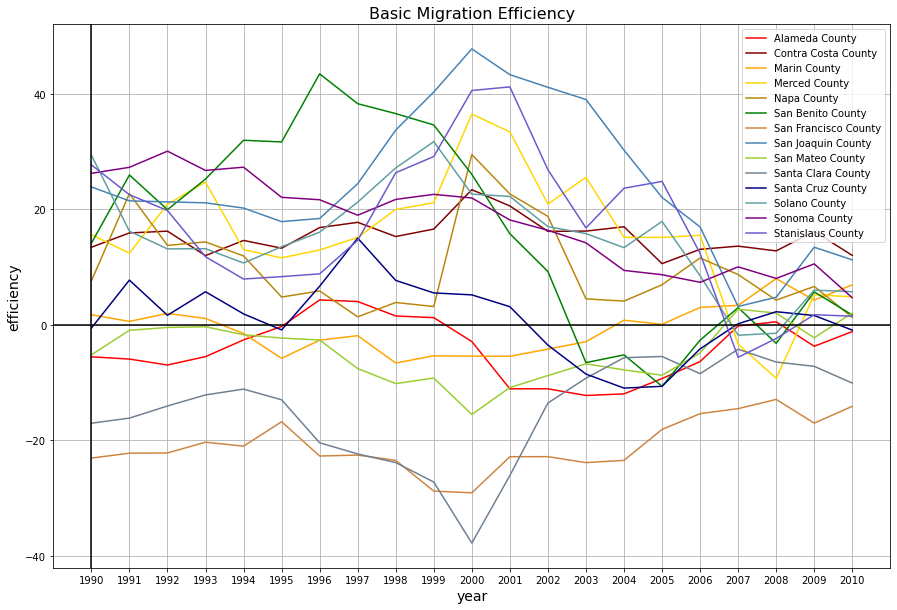

In [60]:
# plotting all 14 counties

plt.figure(figsize=(15,10))

#plot individual lines with different colors
plt.plot(df[6001], label='Alameda County', color='red')
plt.plot(df[6013], label='Contra Costa County', color='maroon')
plt.plot(df[6041], label='Marin County', color='orange')
plt.plot(df[6047], label='Merced County', color='gold')
plt.plot(df[6055], label='Napa County', color='darkgoldenrod')
plt.plot(df[6069], label='San Benito County', color='green')
plt.plot(df[6075], label='San Francisco County', color='peru')
plt.plot(df[6077], label='San Joaquin County', color='steelblue')
plt.plot(df[6081], label='San Mateo County', color='yellowgreen')
plt.plot(df[6085], label='Santa Clara County', color='slategray')
plt.plot(df[6087], label='Santa Cruz County', color='navy')
plt.plot(df[6095], label='Solano County', color='cadetblue')
plt.plot(df[6097], label='Sonoma County', color='purple')
plt.plot(df[6099], label='Stanislaus County', color='slateblue')

# bold origin axes
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')


#add legend
plt.legend()

#add axis labels and a title
plt.ylabel('efficiency', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.title('Basic Migration Efficiency', fontsize=16)
plt.grid()
         
plt.savefig('/Users/kaitlynhom/Downloads/migration_project/graphs/all_efficiency.jpg')


#display plot
plt.show()

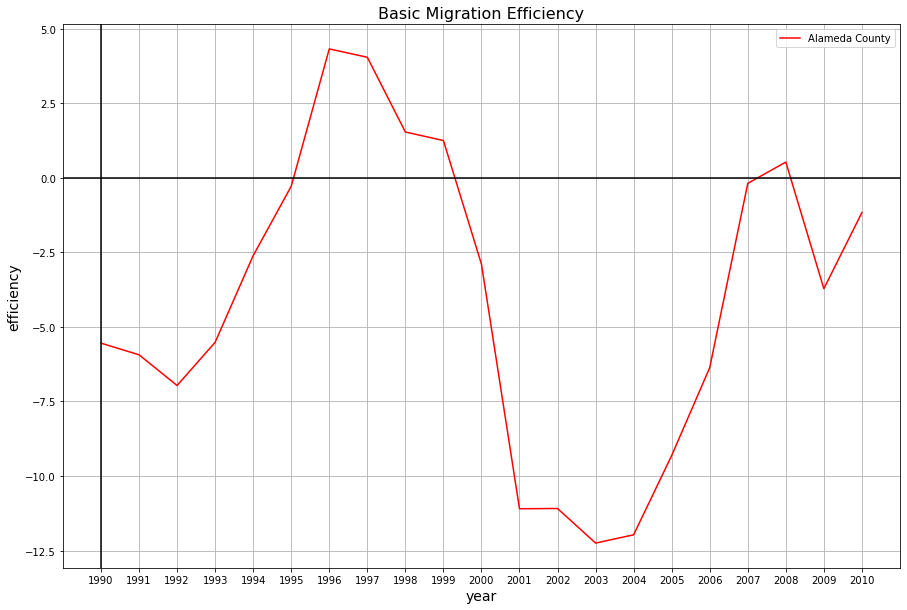

In [61]:
# plotting all 14 counties

plt.figure(figsize=(15,10))

#plot individual lines with different colors
plt.plot(df[6001], label='Alameda County', color='red')


# bold origin axes
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')


#add legend
plt.legend()

#add axis labels and a title
plt.ylabel('efficiency', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.title('Basic Migration Efficiency', fontsize=16)
plt.grid()
         
plt.savefig('/Users/kaitlynhom/Downloads/migration_project/graphs/all_efficiency.jpg')


#display plot
plt.show()

In [62]:
incomeefficiency = pd.read_csv("/Users/kaitlynhom/Downloads/migration_project/incomeefficiency.csv")

In [63]:
incomeefficiency.set_index("fips", inplace = True)

In [64]:
yearslist1=[
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010']

In [65]:
incomeefficiency.columns = yearslist1

In [66]:
incomeefficiency=incomeefficiency.transpose()

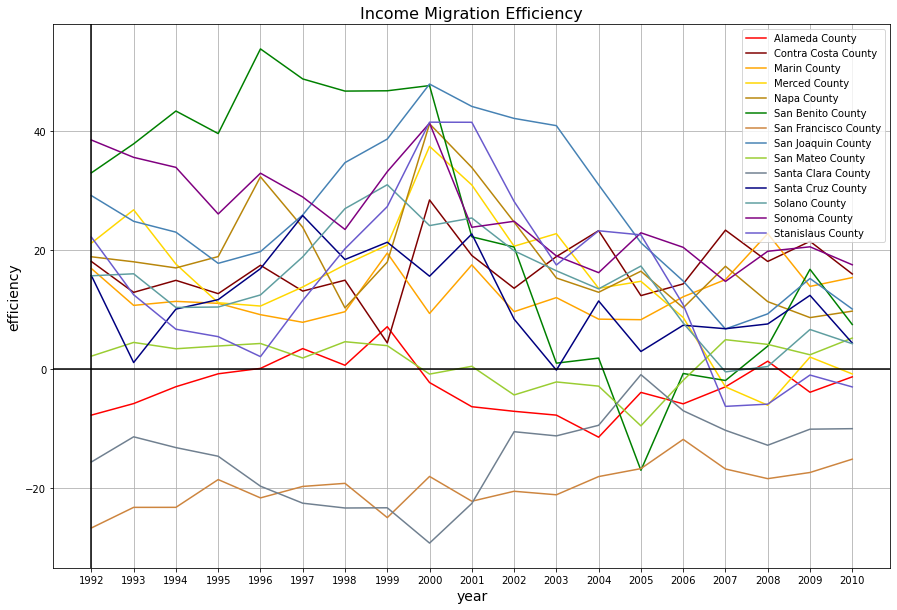

In [67]:
# plotting all 14 counties

plt.figure(figsize=(15,10))

#plot individual lines with different colors
plt.plot(incomeefficiency[6001], label='Alameda County', color='red')
plt.plot(incomeefficiency[6013], label='Contra Costa County', color='maroon')
plt.plot(incomeefficiency[6041], label='Marin County', color='orange')
plt.plot(incomeefficiency[6047], label='Merced County', color='gold')
plt.plot(incomeefficiency[6055], label='Napa County', color='darkgoldenrod')
plt.plot(incomeefficiency[6069], label='San Benito County', color='green')
plt.plot(incomeefficiency[6075], label='San Francisco County', color='peru')
plt.plot(incomeefficiency[6077], label='San Joaquin County', color='steelblue')
plt.plot(incomeefficiency[6081], label='San Mateo County', color='yellowgreen')
plt.plot(incomeefficiency[6085], label='Santa Clara County', color='slategray')
plt.plot(incomeefficiency[6087], label='Santa Cruz County', color='navy')
plt.plot(incomeefficiency[6095], label='Solano County', color='cadetblue')
plt.plot(incomeefficiency[6097], label='Sonoma County', color='purple')
plt.plot(incomeefficiency[6099], label='Stanislaus County', color='slateblue')

# bold origin axes
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')


#add legend
plt.legend()

#add axis labels and a title
plt.ylabel('efficiency', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.title('Income Migration Efficiency', fontsize=16)
plt.grid()
         
plt.savefig('/Users/kaitlynhom/Downloads/migration_project/graphs/all_efficiency.jpg')


#display plot
plt.show()

## cluster counties

In [68]:
clusterinflows= pd.read_csv("/Users/kaitlynhom/Downloads/migration_project/bayareainflows1990-2011.csv")
clusteroutflows= pd.read_csv("/Users/kaitlynhom/Downloads/migration_project/bayareaoutflows1990-2011.csv")
clusterIncomeIn= pd.read_csv("/Users/kaitlynhom/Downloads/migration_project/aggregatedinflowsincome.csv")
clusterIncomeOut= pd.read_csv("/Users/kaitlynhom/Downloads/migration_project/aggregatedincomeoutflows.csv")
clusterpopulation= pd.read_csv("/Users/kaitlynhom/Downloads/migration_project/bayareapopulation1990-2011.csv")

In [69]:
#bayArea['clusters'] = ['Center City', 'Inner Suburb', 'Outer Suburb','Far-Flung Suburb','Outer Suburb','Far-Flung Suburb','Center City','Far-Flung Suburb','Inner Suburb','Center City','Far-Flung Suburb','Outer Suburb','Outer Suburb','Far-Flung Suburb']

In [70]:
bayArea['clusters'] = ['Large central metro', 'Large fringe metro', 'Large fringe metro','Small metro','Small metro','Large fringe metro','Large central metro','Medium metro','Large fringe metro','Large central metro','Medium metro','Medium metro','Medium metro','Medium metro']
clusterList = bayArea.clusters.values


In [71]:
bayArea

,name,code,clusters
fips,,,
6001,Alameda County,1,Large central metro
6013,Contra Costa County,13,Large fringe metro
6041,Marin County,41,Large fringe metro
6047,Merced County,47,Small metro
6055,Napa County,55,Small metro
6069,San Benito County,69,Large fringe metro
6075,San Francisco County,75,Large central metro
6077,San Joaquin County,77,Medium metro
6081,San Mateo County,81,Large fringe metro


In [72]:
clusterinflows.insert(0, "clusters", bayArea.clusters.values)
clusteroutflows.insert(0, "clusters", bayArea.clusters.values)

clusterIncomeIn.insert(0, "clusters", bayArea.clusters.values)
clusterIncomeOut.insert(0, "clusters", bayArea.clusters.values)

clusterpopulation.insert(0, "clusters", bayArea.clusters.values)

clusterinflows.insert(0, "name", bayArea.name.values)

clusteroutflows.insert(0, "name", bayArea.name.values)
clusterpopulation.insert(0, "name", bayArea.name.values)

In [73]:
clusterinflows=clusterinflows.groupby(['clusters']).sum()
clusteroutflows=clusteroutflows.groupby(['clusters']).sum()
clusterIncomeIn=clusterIncomeIn.groupby(['clusters']).sum()
clusterIncomeOut=clusterIncomeOut.groupby(['clusters']).sum()
clusterpopulation=clusterpopulation.groupby(['clusters']).sum()




In [74]:
clusterinflows=clusterinflows.drop(columns=["destination"])
clusteroutflows=clusteroutflows.drop(columns=["origin"])
clusterIncomeIn.drop(clusterIncomeIn.columns[[0,1]], axis = 1, inplace = True)
clusterIncomeOut.drop(clusterIncomeOut.columns[[0,1]], axis = 1, inplace = True)
clusterpopulation.drop(clusterpopulation.columns[[0]], axis = 1, inplace = True)

In [75]:
clusterIncomeIn.columns = yearslist1
clusterIncomeOut.columns = yearslist1

In [76]:
clusterList = clusterinflows.index

In [77]:
clusterIncomeIn

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
clusters,,,,,,,,,,,,,,,,,,,
Large central metro,1492613,1528251,1534564,1705788,1943313,2328014,2640661,3462991,4154293,3145848,2979167,2921203,3046902,3444586,2942368,3099745,2998007,3055215,3107939
Large fringe metro,1319417,1254569,1253112,1332572,1582756,1772783,2085515,2661500,3122744,2414548,2178780,2248133,2363978,2172297,1993925,2319145,2210464,2199797,2163909
Medium metro,683888,640160,611013,627933,710337,864803,1017012,1287869,1710804,1394863,1272521,1258461,1306868,1272330,1088020,991945,1051105,1040204,957020
Small metro,93932,94463,89849,84374,125389,134921,139576,191546,243127,226096,196651,207038,201690,209466,171459,169493,171162,170595,161202


In [78]:
# calculate basic migration efficiency and income migration efficiency using Sturtevant paper formula
clusterefficiency = (clusterinflows.values - clusteroutflows.values)/(clusterinflows.values + clusteroutflows.values)*100
clusterefficiency = pd.DataFrame(data=clusterefficiency)

clusterIncomeEfficiency = (clusterIncomeIn.values - clusterIncomeOut.values)/(clusterIncomeIn.values + clusterIncomeOut.values)*100
clusterIncomeEfficiency = pd.DataFrame(data=clusterIncomeEfficiency)


#set row and column headers
clusterefficiency.insert(0, "cluster", clusterList)
clusterefficiency.set_index("cluster", inplace = True)
clusterefficiency.columns = yearslist 

clusterIncomeEfficiency.insert(0, "cluster", clusterList)
clusterIncomeEfficiency.set_index("cluster", inplace = True)
clusterIncomeEfficiency.columns = yearslist1

In [79]:
clusterefficiency

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
cluster,,,,,,,,,,,,,,,,,,,,,
Large central metro,-14.198484,-13.859865,-13.630967,-11.891612,-10.581371,-8.860032,-10.893197,-11.418360,-13.182647,-15.608710,...,-18.938292,-14.871498,-14.307521,-12.957744,-10.365552,-9.302226,-5.091397,-5.023784,-8.282757,-7.265996
Large fringe metro,3.806862,6.676539,7.197383,5.512144,5.885126,4.538001,6.908978,5.356617,2.836538,4.020602,...,4.196281,3.289506,3.899728,4.311769,0.753520,4.139173,7.832274,7.464965,7.133758,7.155050
Medium metro,23.923552,19.984411,18.336254,16.414819,14.385986,13.255144,14.932904,19.490903,25.760231,29.513535,...,31.763070,25.427478,22.189853,19.267981,17.739664,11.198150,0.466998,1.830840,7.634763,5.850103
Small metro,12.072682,16.962184,17.771669,20.501821,12.577937,8.968254,9.673093,8.755108,12.586044,12.924703,...,28.672074,19.965545,16.641662,10.930984,12.024444,14.092245,0.970507,-4.322733,5.777829,3.467267


In [80]:
clusterIncomeEfficiency

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
cluster,,,,,,,,,,,,,,,,,,,
Large central metro,-16.051673,-12.903074,-12.423777,-10.638977,-12.927432,-11.965842,-13.511678,-12.941265,-17.142380,-16.481331,-12.184687,-12.834946,-12.749106,-6.779678,-8.077385,-9.558564,-9.344331,-10.065547,-8.361391
Large fringe metro,11.382731,9.267262,9.808203,8.964003,10.878563,8.063150,10.036229,7.222070,12.420981,10.180257,5.106502,8.066094,9.155352,1.173254,6.415171,13.499670,12.333710,11.735579,10.904060
Medium metro,24.604830,19.181243,17.855614,15.052191,18.018430,22.986858,25.424490,31.037469,35.199794,32.486885,27.015534,22.379874,20.630220,18.320343,12.803887,4.177738,6.145203,10.867227,7.040357
Small metro,19.794417,21.902685,17.216007,15.475628,24.630003,20.032739,13.099425,18.909523,39.662343,32.661312,23.065707,18.420097,13.146896,15.634756,9.483262,7.610504,3.300059,5.528338,5.137453


In [81]:
clusterplot=clusterefficiency.transpose()
clusterIncomePlot=clusterIncomeEfficiency.transpose()

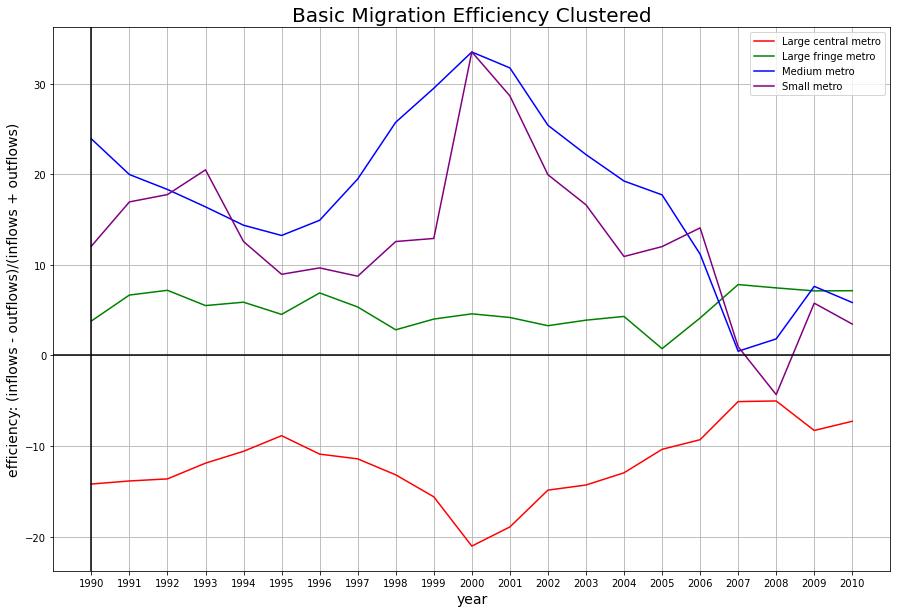

In [82]:
# plotting all 4 clusters

plt.figure(figsize=(15,10))

#plot individual lines with different colors
plt.plot(clusterplot['Large central metro'], label='Large central metro', color='red')
plt.plot(clusterplot['Large fringe metro'], label='Large fringe metro', color='green')
plt.plot(clusterplot['Medium metro'], label='Medium metro', color='blue')
plt.plot(clusterplot['Small metro'], label='Small metro', color='purple')


# bold origin axes
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')


#add legend
plt.legend()

#add axis labels and a title
plt.ylabel('efficiency: (inflows - outflows)/(inflows + outflows)', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.title('Basic Migration Efficiency Clustered', fontsize=20)
plt.grid()


# save plot
plt.savefig('/Users/kaitlynhom/Downloads/migration_project/graphs/clustered_efficiency.jpg')


#display plot
plt.show()



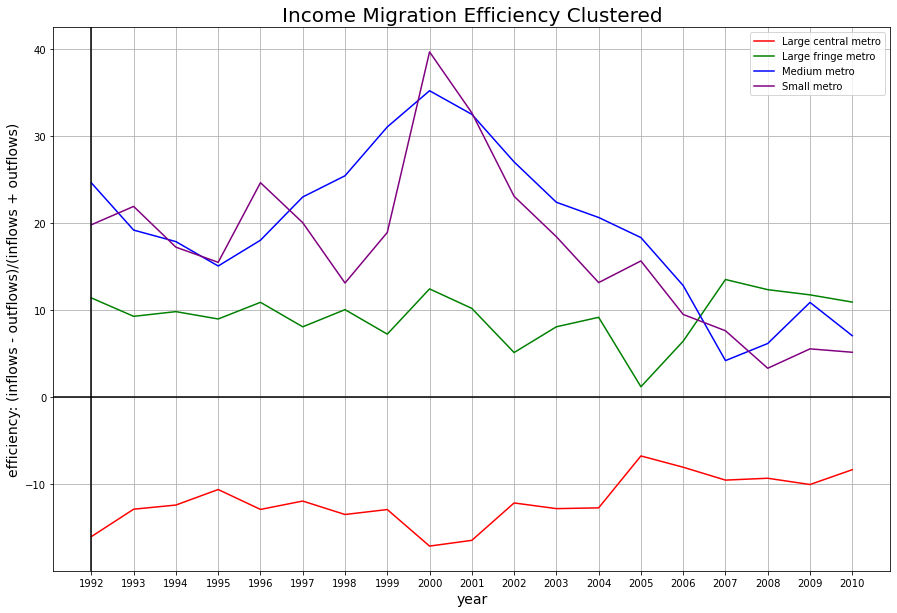

In [83]:
# plotting all 4 clusters

plt.figure(figsize=(15,10))

#plot individual lines with different colors
plt.plot(clusterIncomePlot['Large central metro'], label='Large central metro', color='red')
plt.plot(clusterIncomePlot['Large fringe metro'], label='Large fringe metro', color='green')
plt.plot(clusterIncomePlot['Medium metro'], label='Medium metro', color='blue')
plt.plot(clusterIncomePlot['Small metro'], label='Small metro', color='purple')


# bold origin axes
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')


#add legend
plt.legend()

#add axis labels and a title
plt.ylabel('efficiency: (inflows - outflows)/(inflows + outflows)', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.title('Income Migration Efficiency Clustered', fontsize=20)
plt.grid()


# save plot
plt.savefig('/Users/kaitlynhom/Downloads/migration_project/graphs/clustered_efficiency.jpg')


#display plot
plt.show()



In [107]:
# normalize inflows
normalized_cluster_in = clusterinflows.values/clusterpopulation.values
normalized_cluster_in = pd.DataFrame(data=normalized_cluster_in);

normalized_cluster_in.insert(0, "cluster", clusterList)
normalized_cluster_in.set_index("cluster", inplace = True)
normalized_cluster_in.columns = yearslist

normalized_cluster_in

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
cluster,,,,,,,,,,,,,,,,,,,,,
Large central metro,0.020472,0.020788,0.020211,0.019938,0.019674,0.019003,0.019569,0.020716,0.020807,0.021233,...,0.020731,0.021855,0.021536,0.021305,0.020565,0.018928,0.019794,0.020542,0.020555,0.019515
Large fringe metro,0.032158,0.033354,0.032641,0.030537,0.029672,0.027820,0.029599,0.030277,0.030629,0.031972,...,0.031297,0.032038,0.031951,0.030918,0.027880,0.025858,0.027009,0.028088,0.028622,0.026992
Medium metro,0.025947,0.023163,0.022116,0.020801,0.019420,0.018002,0.018607,0.020250,0.022989,0.024980,...,0.026938,0.025091,0.024788,0.024094,0.022707,0.019194,0.017128,0.018478,0.018823,0.017221
Small metro,0.024990,0.024986,0.023972,0.024160,0.021572,0.017603,0.020913,0.021750,0.023990,0.024945,...,0.031441,0.027532,0.029005,0.025691,0.025069,0.023701,0.021019,0.021551,0.023807,0.020999


In [108]:
# normalize income inflows
income92in = clusterinflows.drop(columns=['1990','1991'])
normalized_income_in = clusterIncomeIn.values/income92in.values
normalized_income_in = pd.DataFrame(data=normalized_income_in);

normalized_income_in.insert(0, "cluster", clusterList)
normalized_income_in.set_index("cluster", inplace = True)
normalized_income_in.columns = yearslist1

normalized_income_in

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
cluster,,,,,,,,,,,,,,,,,,,
Large central metro,20.519838,21.123611,21.396598,24.438223,26.682498,29.723249,33.092649,42.107842,52.700728,38.528923,34.915114,34.924238,36.951853,43.171189,39.814996,39.681815,36.400809,36.558753,38.776532
Large fringe metro,22.749746,22.828608,23.247106,26.127838,28.837153,30.994877,35.498128,42.926035,50.119475,38.982047,34.367783,35.521141,38.592409,39.194865,38.753863,42.862199,38.769868,37.367029,38.515369
Medium metro,16.335555,16.041296,16.230920,17.840019,19.309982,21.273320,21.638093,24.718226,27.659192,23.747199,22.901485,22.644372,23.957689,24.548612,24.724918,25.127163,24.527010,23.625965,23.492071
Small metro,12.897432,12.689817,13.269680,15.363074,19.166769,19.500072,17.965761,23.285436,22.179073,20.805742,20.171402,19.725419,21.358678,22.405177,19.200336,21.157533,20.649294,18.488675,19.501815


In [109]:
clusterIncomeOut

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
clusters,,,,,,,,,,,,,,,,,,,
Large central metro,2063415,1981060,1969958,2111957,2520350,2960874,3465738,4492537,5873253,4387433,3805907,3781490,3937329,3945618,3459469,3754956,3616046,3739100,3675095
Large fringe metro,1049742,1041762,1029253,1113322,1272180,1508230,1705082,2302963,2432703,1968357,1967072,1912530,1967423,2121915,1753520,1767466,1725067,1737708,1738399
Medium metro,413803,434103,425871,463629,493436,541531,604700,677781,819975,710799,731204,798186,859866,878323,841027,912387,929399,836282,831128
Small metro,62890,60518,63456,61759,75829,89886,107244,130625,105037,114766,122936,142629,154820,152823,141756,145519,160226,152721,145448


In [112]:
# normalize outflows
income92out = clusteroutflows.drop(columns=['1990','1991'])

normalized_cluster_out = clusteroutflows.values/clusterpopulation.values
normalized_cluster_out = pd.DataFrame(data=normalized_cluster_out);

normalized_cluster_out.insert(0, "cluster", clusterList)
normalized_cluster_out.set_index("cluster", inplace = True)
normalized_cluster_out.columns = yearslist

normalized_cluster_out

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
cluster,,,,,,,,,,,,,,,,,,,,,
Large central metro,0.027248,0.027478,0.026591,0.025320,0.024330,0.022697,0.024354,0.026057,0.027125,0.029087,...,0.030418,0.029491,0.028727,0.027649,0.025321,0.022811,0.021918,0.022716,0.024268,0.022573
Large fringe metro,0.029799,0.029179,0.028257,0.027346,0.026374,0.025405,0.025773,0.027199,0.028940,0.029500,...,0.028776,0.029997,0.029553,0.028362,0.027463,0.023803,0.023085,0.024186,0.024810,0.023387
Medium metro,0.015929,0.015447,0.015262,0.014935,0.014536,0.013788,0.013772,0.013644,0.013571,0.013595,...,0.013950,0.014918,0.015785,0.016309,0.015865,0.015328,0.016969,0.017813,0.016153,0.015318
Small metro,0.019606,0.017739,0.016737,0.015939,0.016752,0.014706,0.017224,0.018248,0.018626,0.019235,...,0.017429,0.018368,0.020728,0.020628,0.019687,0.017846,0.020615,0.023498,0.021206,0.019592


In [117]:
# normalize income outflows
income92out = clusteroutflows.drop(columns=['1990','1991'])

normalized_income_out = clusterIncomeOut.values/popinc.values
normalized_income_out = pd.DataFrame(data=normalized_income_out);

normalized_income_out.insert(0, "cluster", clusterList)
normalized_income_out.set_index("cluster", inplace = True)
normalized_income_out.columns = yearslist1

normalized_income_out

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
cluster,,,,,,,,,,,,,,,,,,,
Large central metro,0.573337,0.545949,0.540397,0.574967,0.677199,0.783145,0.903683,1.159865,1.501085,1.114005,0.974830,0.973628,1.017342,1.016945,0.886068,0.951486,0.901909,0.919693,0.894813
Large fringe metro,0.590792,0.578870,0.566561,0.607280,0.686054,0.798400,0.888947,1.187549,1.239953,0.994580,0.994088,0.965515,0.993045,1.067392,0.881292,0.882268,0.849854,0.844858,0.835180
Medium metro,0.218598,0.226270,0.219700,0.237118,0.249589,0.269749,0.295775,0.324954,0.384859,0.325978,0.330180,0.356007,0.379803,0.384807,0.366833,0.395861,0.400723,0.357531,0.351342
Small metro,0.207004,0.196418,0.202170,0.197953,0.242408,0.282554,0.331156,0.396121,0.311846,0.332045,0.347184,0.394141,0.421202,0.409785,0.376232,0.381816,0.416571,0.394035,0.369499


In [115]:
normalized_cluster_in

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
cluster,,,,,,,,,,,,,,,,,,,,,
Large central metro,0.020472,0.020788,0.020211,0.019938,0.019674,0.019003,0.019569,0.020716,0.020807,0.021233,...,0.020731,0.021855,0.021536,0.021305,0.020565,0.018928,0.019794,0.020542,0.020555,0.019515
Large fringe metro,0.032158,0.033354,0.032641,0.030537,0.029672,0.027820,0.029599,0.030277,0.030629,0.031972,...,0.031297,0.032038,0.031951,0.030918,0.027880,0.025858,0.027009,0.028088,0.028622,0.026992
Medium metro,0.025947,0.023163,0.022116,0.020801,0.019420,0.018002,0.018607,0.020250,0.022989,0.024980,...,0.026938,0.025091,0.024788,0.024094,0.022707,0.019194,0.017128,0.018478,0.018823,0.017221
Small metro,0.024990,0.024986,0.023972,0.024160,0.021572,0.017603,0.020913,0.021750,0.023990,0.024945,...,0.031441,0.027532,0.029005,0.025691,0.025069,0.023701,0.021019,0.021551,0.023807,0.020999


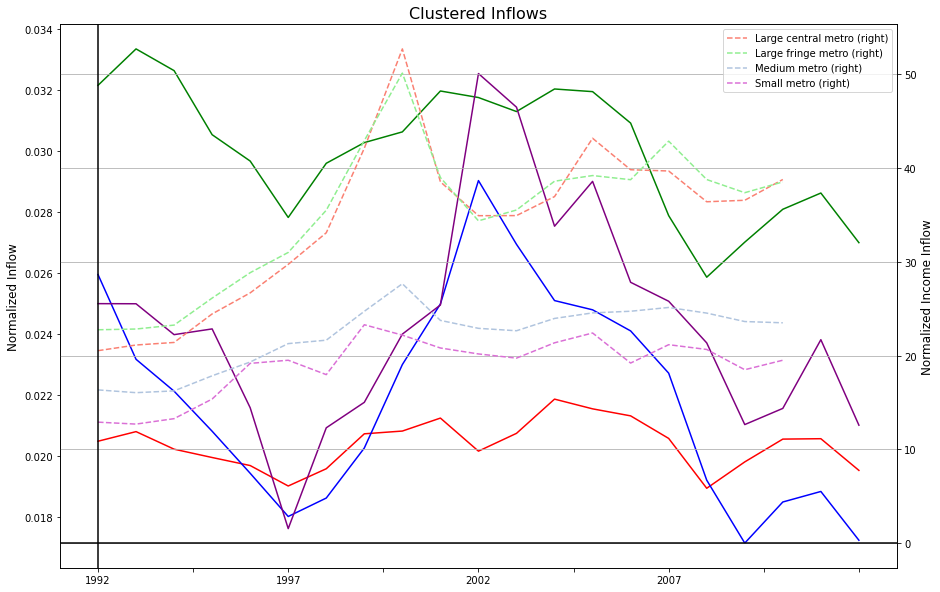

In [116]:
inplot = normalized_cluster_in.transpose()
incin = normalized_income_in.transpose()

# plotting all 4 clusters


plt.figure(figsize=(15,10))

#plot individual lines with different colors
ax1= inplot['Large central metro'].plot(label='Large central metro', color='red')
ax1= inplot['Large fringe metro'].plot( label='Large fringe metro', color='green')
ax1= inplot['Medium metro'].plot(label='Medium metro', color='blue')
ax1= inplot['Small metro'].plot(label='Small metro', color='purple')

#plot income with dashed lines
ax2=incin['Large central metro'].plot(label='Large central metro', color='salmon', linestyle="--", secondary_y=True)
ax2=incin['Large fringe metro'].plot(label='Large fringe metro', color='lightgreen', linestyle="--", secondary_y=True)
ax2=incin['Medium metro'].plot(label='Medium metro', color='lightsteelblue', linestyle="--", secondary_y=True)
ax2=incin['Small metro'].plot(label='Small metro', color='orchid', linestyle="--", secondary_y=True)



# bold origin axes
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

#add legend
plt.legend()

#add axis labels and a title
ax1.set_ylabel("Normalized Inflow",color="black",fontsize=12)
ax2.set_ylabel("Normalized Income Inflow",color="black",fontsize=12)
plt.xlabel('year', fontsize=12)


#plt.xlabel('year', fontsize=14)
plt.title('Clustered Inflows', fontsize=16)
plt.grid()


#save graph
plt.savefig('/Users/kaitlynhom/Downloads/migration_project/graphs/inflowsincome.jpg')

#display plot
plt.show()

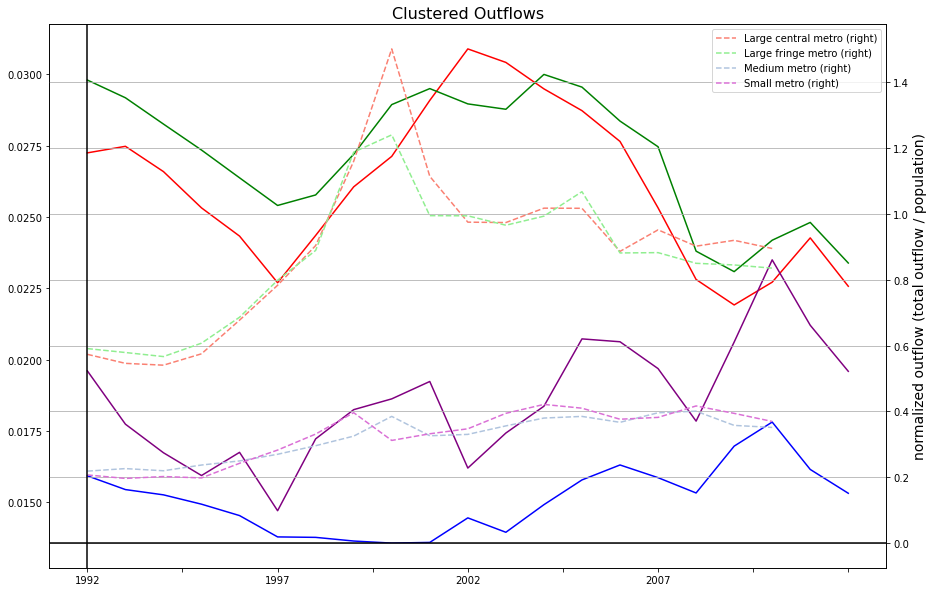

In [118]:
outplot = normalized_cluster_out.transpose()
incout = normalized_income_out.transpose()

# plotting all 4 clusters

plt.figure(figsize=(15,10))

#plot individual lines with different colors
ax1= outplot['Large central metro'].plot(label='Large central metro', color='red')
ax1= outplot['Large fringe metro'].plot( label='Large fringe metro', color='green')
ax1= outplot['Medium metro'].plot(label='Medium metro', color='blue')
ax1= outplot['Small metro'].plot(label='Small metro', color='purple')

#plot income with dashed lines
ax2=incout['Large central metro'].plot(label='Large central metro', color='salmon', linestyle="--", secondary_y=True)
ax2=incout['Large fringe metro'].plot(label='Large fringe metro', color='lightgreen', linestyle="--", secondary_y=True)
ax2=incout['Medium metro'].plot(label='Medium metro', color='lightsteelblue', linestyle="--", secondary_y=True)
ax2=incout['Small metro'].plot(label='Small metro', color='orchid', linestyle="--", secondary_y=True)

# bold origin axes
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')


#add legend
plt.legend()

#add axis labels and a title
plt.ylabel('normalized outflow (total outflow / population)', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.title('Clustered Outflows', fontsize=16)
plt.grid()


#save graph
plt.savefig('/Users/kaitlynhom/Downloads/migration_project/graphs/clustered_outflows.jpg')

#display plot
plt.show()